In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import plotly.express as px
filterwarnings('ignore')

In [6]:
tech_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

all_data = pd.DataFrame()

for file in tech_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [7]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [9]:
all_data['date']=pd.to_datetime(all_data['date'])

In [10]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [11]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

# Closing prices Analysis

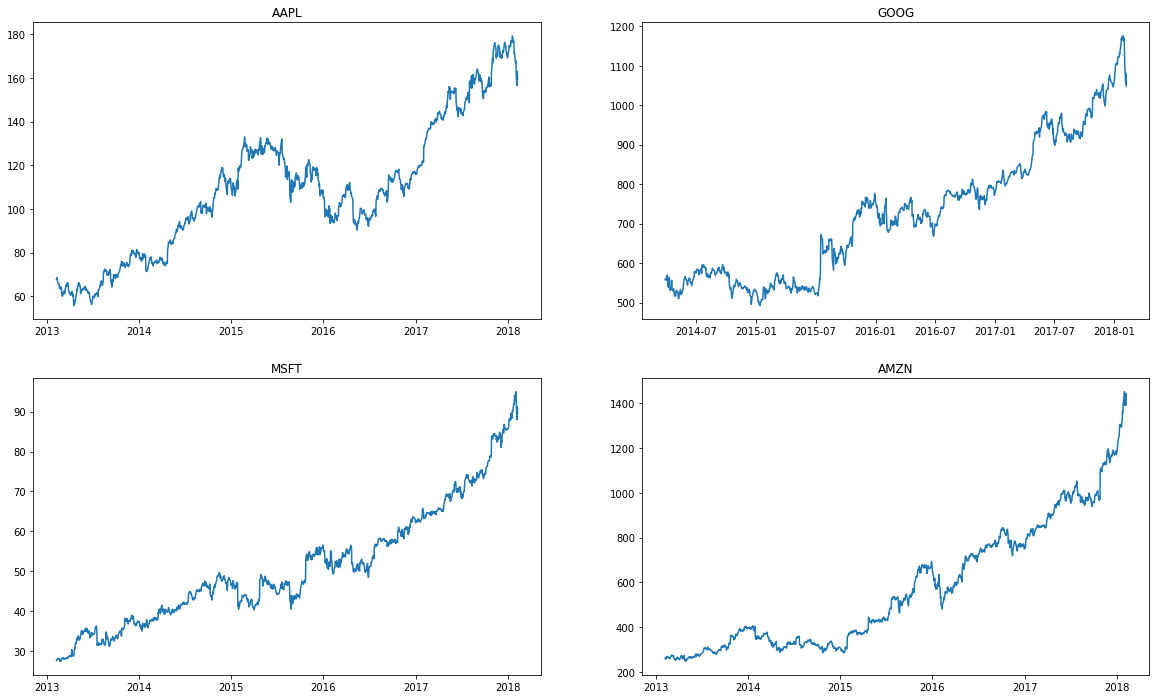

In [12]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

# Volume Analysis

In [14]:
for i in tech_list:
    df=all_data[all_data['Name']==i]
    fig = px.line(df, x="date", y="volume", title=i)
    fig.show()

# Analysing Daily Movement of Apple stock

In [17]:
df=pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [18]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


In [22]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='Apple')
fig.show()

In [20]:
df2=df.copy()

In [21]:
df2.dtypes

date              object
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
1day % return    float64
dtype: object

In [23]:
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date',inplace=True)

# Analyzing monthly averages and yearly averages trend

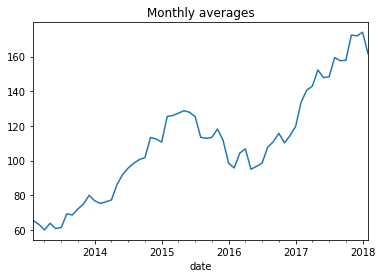

In [29]:
df2['close'].resample('M').mean().plot()
plt.title('Monthly averages')
plt.show()

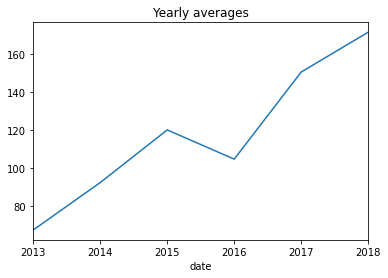

In [30]:
df2['close'].resample('Y').mean().plot()
plt.title('Yearly averages')
plt.show()

##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [32]:
aapl=pd.read_csv('AAPL_data.csv')
aapl.head()

goog=pd.read_csv('GOOG_data.csv')
goog.head()

amzn=pd.read_csv('AMZN_data.csv')
amzn.head()

msft=pd.read_csv('MSFT_data.csv')
msft.head()



### create a blank dataframe
close=pd.DataFrame()

close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


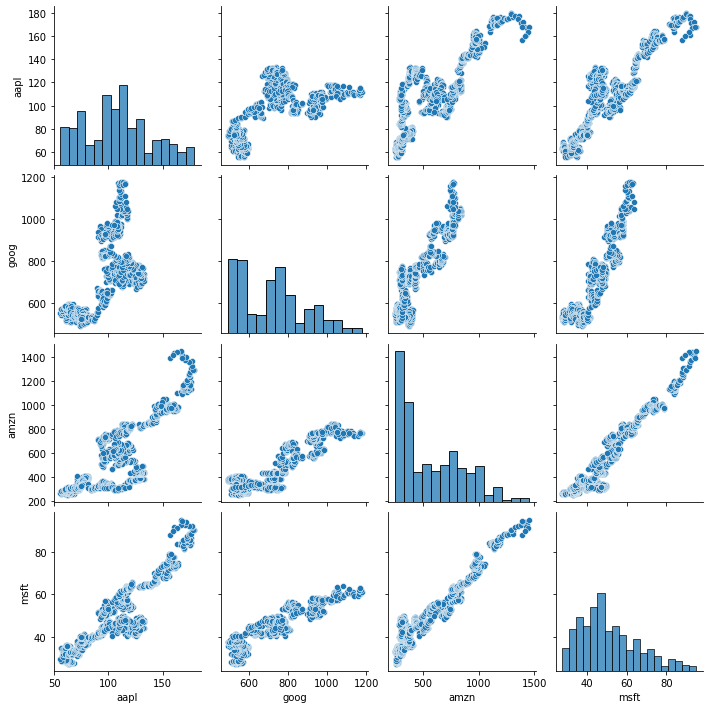

In [33]:
sns.pairplot(data=close)

<AxesSubplot:>

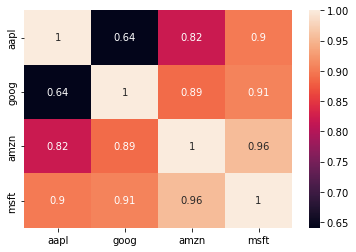

In [34]:
sns.heatmap(close.corr(),annot=True)

#### Analyse Daily return of each stock & how they are co-related

In [36]:
data=pd.DataFrame()
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

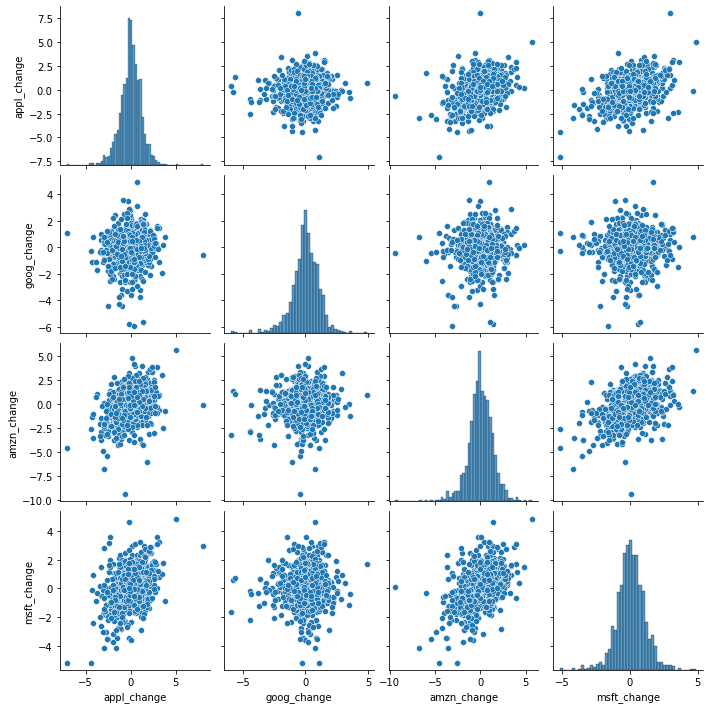

In [37]:
sns.pairplot(data=data)
plt.show()

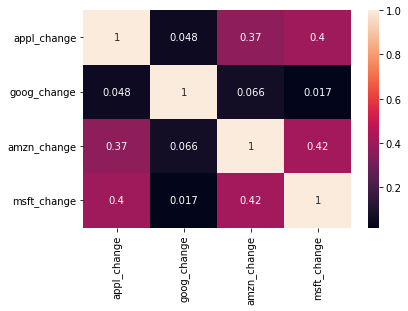

In [39]:
sns.heatmap(data.corr(),annot=True)
plt.show()

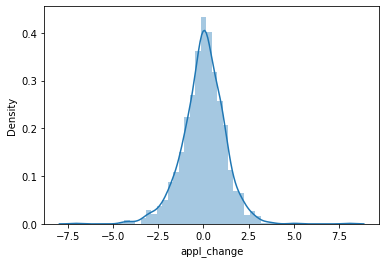

In [41]:
sns.distplot(data['appl_change'])
plt.show()

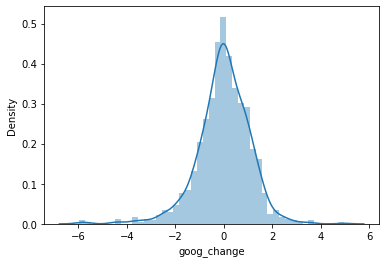

In [42]:
sns.distplot(data['goog_change'])
plt.show()

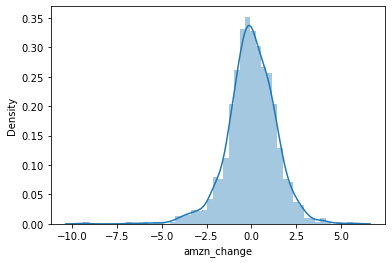

In [43]:
sns.distplot(data['amzn_change'])
plt.show()

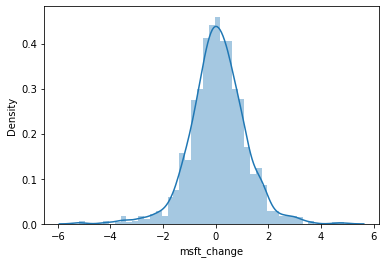

In [44]:
sns.distplot(data['msft_change'])
plt.show()

In [45]:
data.describe().T

#Microfot has the least standard deviation among tech companies which results in less daily volatility

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
